In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from commando import ComManDo
from commando.evaluation import generate_figure, test_partial
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2022-03-02 02:41:30.132801: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-02 02:41:30.132833: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
data1 = np.loadtxt("../data/UnionCom/simu1/domain1.txt")
data2 = np.loadtxt("../data/UnionCom/simu1/domain2.txt")
type1 = np.loadtxt("../data/UnionCom/simu1/type1.txt")
type2 = np.loadtxt("../data/UnionCom/simu1/type2.txt")
type1 = type1.astype(np.int)
type2 = type2.astype(np.int)
type_func = lambda x: x

# ComManDo Aligned

In [4]:
cm = ComManDo()
cm_data = cm.fit_transform(dataset=[data1,data2])

use random seed: 666
Shape of Raw data
Dataset 0: (300, 1000)
Dataset 1: (300, 500)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:1.6447 alpha:0.6584
epoch:[200/2000] err:1.0756 alpha:0.4405
epoch:[300/2000] err:1.0785 alpha:0.4617
epoch:[400/2000] err:1.0615 alpha:0.4804
epoch:[500/2000] err:1.0320 alpha:0.4984
epoch:[600/2000] err:0.9937 alpha:0.5168
epoch:[700/2000] err:0.9436 alpha:0.5364
epoch:[800/2000] err:0.8768 alpha:0.5580
epoch:[900/2000] err:0.7976 alpha:0.5809
epoch:[1000/2000] err:0.7222 alpha:0.6023
epoch:[1100/2000] err:0.6627 alpha:0.6195
epoch:[1200/2000] err:0.6187 alpha:0.6327
epoch:[1300/2000] err:0.5845 alpha:0.6433
epoch:[1400/2000] err:0.5559 alpha:0.6523
epoch:[1500/2000] err:0.5306 alpha:0.6603
epoch:[1600/2000] err:0.5071 alpha:0.6676
epoch:[1700/2000] err:0.4846 alpha:0.6744
epoch:[1800/2000] err:0.4634 alpha:0.6808
epoch:[1900/2000] err:0.4434 alpha:0.6866
epoch:[2000/2000] err:0.4250 

# UnionCom Unaligned

In [5]:
uc = ComManDo(project_mode='tsne')
uc_data = uc.fit_transform(dataset=[data1,data2])

use random seed: 666
Shape of Raw data
Dataset 0: (300, 1000)
Dataset 1: (300, 500)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:1.6447 alpha:0.6584
epoch:[200/2000] err:1.0756 alpha:0.4405
epoch:[300/2000] err:1.0785 alpha:0.4617
epoch:[400/2000] err:1.0615 alpha:0.4804
epoch:[500/2000] err:1.0320 alpha:0.4984
epoch:[600/2000] err:0.9937 alpha:0.5168
epoch:[700/2000] err:0.9436 alpha:0.5364
epoch:[800/2000] err:0.8768 alpha:0.5580
epoch:[900/2000] err:0.7976 alpha:0.5809
epoch:[1000/2000] err:0.7222 alpha:0.6023
epoch:[1100/2000] err:0.6627 alpha:0.6195
epoch:[1200/2000] err:0.6187 alpha:0.6327
epoch:[1300/2000] err:0.5845 alpha:0.6433
epoch:[1400/2000] err:0.5559 alpha:0.6523
epoch:[1500/2000] err:0.5306 alpha:0.6603
epoch:[1600/2000] err:0.5071 alpha:0.6676
epoch:[1700/2000] err:0.4846 alpha:0.6744
epoch:[1800/2000] err:0.4634 alpha:0.6808
epoch:[1900/2000] err:0.4434 alpha:0.6866
epoch:[2000/2000] err:0.4250 

# Figure Generation

use random seed: 666
Shape of Raw data
Dataset 0: (300, 1000)
Dataset 1: (300, 500)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:1.6447 alpha:0.6584
epoch:[200/2000] err:1.0756 alpha:0.4405
epoch:[300/2000] err:1.0785 alpha:0.4617
epoch:[400/2000] err:1.0615 alpha:0.4804
epoch:[500/2000] err:1.0320 alpha:0.4984
epoch:[600/2000] err:0.9937 alpha:0.5168
epoch:[700/2000] err:0.9436 alpha:0.5364
epoch:[800/2000] err:0.8768 alpha:0.5580
epoch:[900/2000] err:0.7976 alpha:0.5809
epoch:[1000/2000] err:0.7222 alpha:0.6023
epoch:[1100/2000] err:0.6627 alpha:0.6195
epoch:[1200/2000] err:0.6187 alpha:0.6327
epoch:[1300/2000] err:0.5845 alpha:0.6433
epoch:[1400/2000] err:0.5559 alpha:0.6523
epoch:[1500/2000] err:0.5306 alpha:0.6603
epoch:[1600/2000] err:0.5071 alpha:0.6676
epoch:[1700/2000] err:0.4846 alpha:0.6744
epoch:[1800/2000] err:0.4634 alpha:0.6808
epoch:[1900/2000] err:0.4434 alpha:0.6866
epoch:[2000/2000] err:0.4250 

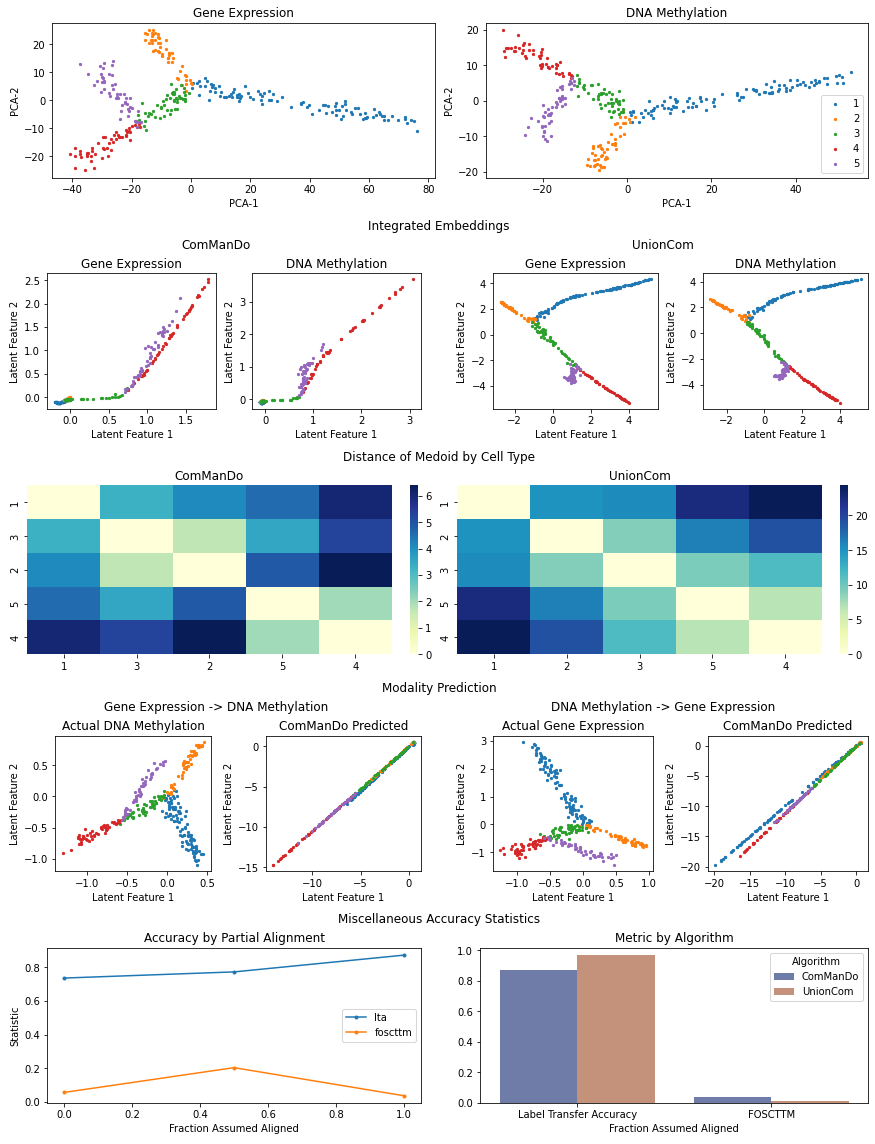

In [6]:
dataset = [data1, data2]
labels = [np.array([type_func(j) for j in i]) for i in (type1,type2)]
params = {
    'dataset_names': ['Gene Expression', 'DNA Methylation'],
    'alg_results': [uc_data],
    'alg_names': ['UnionCom'],
}
generate_figure(cm, cm_data, dataset, labels, **params)